<a href="https://colab.research.google.com/github/GGalm/Panpassa/blob/main/Assignment1_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Panpassa Pakdesee 6304052610225**

Classwork 1

Using dataset provide:

Perform
1.   Stat feature selection
2.   RFE
3.   Permutation feature important

Comparison in model developing by using all features vs (1) vs (2) vs (3)

Please submit resolve in notebook with result variables:

o Number of features

o Selected features

o Feature Ranking

o Model result

In [20]:
import pandas as pd
header = ["Number_of_times_pregnant", #Feature_1
          "Plasma_glucose_concentration_a_2-hours_in_an_oral_glucose_tolerance_test", #Feature_2
          "Diastolic_blood_pressure", #Feature_3
          "Triceps_skin_fold_thickness", #Feature_4
          "2-Hour_serum_insulin", #Feature_5
          "Body_mass_index", #Feature_6
          "Diabetes_pedigree_function", #Feature_7
          "Age", #Feature_8
          "Class_variable"] # Class
df = pd.read_csv("/content/drive/MyDrive/Colab/pima-indians-diabetes.csv", names=header)
df

,Number_of_times_pregnant,Plasma_glucose_concentration_a_2-hours_in_an_oral_glucose_tolerance_test,Diastolic_blood_pressure,Triceps_skin_fold_thickness,2-Hour_serum_insulin,Body_mass_index,Diabetes_pedigree_function,Age,Class_variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1.Stat feature selection

1. Original Number of Features: 8
2. Selected Features: 4

3. Feature Ranking:
  Feature_name  F-statistic  Feature_Ranking  Select_Feature
0    Feature_1    27.550001                4            True
1    Feature_2   160.769030                1            True
2    Feature_3     4.147608                7           False
3    Feature_4     2.059429                8           False
4    Feature_5     7.290108                6           False
5    Feature_6    63.378414                2            True
6    Feature_7    14.977704                5           False
7    Feature_8    52.326951                3            True

4. Model result:
Accuracy: 0.7662337662337663


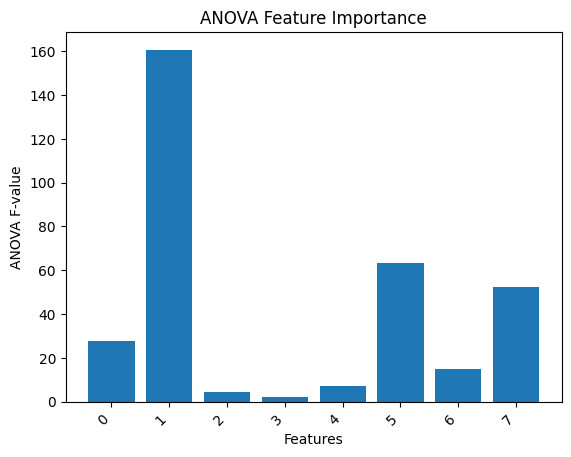

In [38]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

# Separate features and target variable
X = df.drop("Class_variable", axis=1)
y = df["Class_variable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform ANOVA-based feature selection with k=4
feature_selection = SelectKBest(score_func=f_classif, k=4)
X_train_selected = feature_selection.fit_transform(X_train, y_train)

# Create DataFrame for Summary
print("1. Original Number of Features:", X.shape[1])
print("2. Selected Features:", X_train_selected.shape[1])

feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
df_results = pd.DataFrame({
    "Feature_name": feature_names,
    "F-statistic": feature_selection.scores_
})

df_results["Feature_Ranking"] = df_results["F-statistic"].rank(ascending=False).astype(int)
df_results["Select_Feature"] = df_results["Feature_Ranking"] <= X_train_selected.shape[1]

print("\n3. Feature Ranking:")
print(df_results)

# Train a model with the selected features
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
X_test_selected = feature_selection.transform(X_test)
y_pred = clf.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\n4. Model result:")
print("Accuracy:", accuracy)

# Plotting the feature scores
pyplot.bar(range(len(feature_selection.scores_)), feature_selection.scores_)
pyplot.xlabel('Features')
pyplot.ylabel('ANOVA F-value')
pyplot.title('ANOVA Feature Importance')
pyplot.xticks(rotation=45, ha='right')
pyplot.show()


# 2.RFE for Classification

In [46]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Separate features and target variable
X = df.drop("Class_variable", axis=1)
y = df["Class_variable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Recursive Feature Elimination (RFE) with RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=clf, n_features_to_select=4)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Train a model with the selected features
clf.fit(X_train_rfe, y_train)

# Make predictions on the test set
X_test_rfe = rfe.transform(X_test)
y_pred = clf.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("1. Number of features:", rfe.n_features_)
print("\n2. Selected features:")
selected_features_indices = rfe.support_
selected_features = X.columns[selected_features_indices]
print(selected_features)
print("\n3. Feature Ranking:")
print("Feature ranking:", rfe.ranking_)
print("\n4. Model result:")
print("Accuracy:", accuracy)

# # Plotting the feature rankings
# plt.figure(figsize=(8, 4))
# plt.bar(range(len(rfe.ranking_)), rfe.ranking_)
# plt.xlabel('Features')
# plt.ylabel('Ranking')
# plt.title('RFE Feature Ranking')
# plt.show()


1. Number of features: 4

2. Selected features:
Index(['Plasma_glucose_concentration_a_2-hours_in_an_oral_glucose_tolerance_test',
       'Body_mass_index', 'Diabetes_pedigree_function', 'Age'],
      dtype='object')

3. Feature Ranking:
Feature ranking: [4 1 2 5 3 1 1 1]

4. Model result:
Accuracy: 0.7532467532467533


# 3.Permutation feature important

  Feature_name  Permutation_Importance  Feature_Ranking  Select_Feature
0    Feature_1                0.008874                6           False
1    Feature_2                0.155411                1            True
2    Feature_3                0.014502                5           False
3    Feature_4               -0.010390                8           False
4    Feature_5               -0.010173                7           False
5    Feature_6                0.075108                2            True
6    Feature_7                0.030519                4            True
7    Feature_8                0.039177                3            True


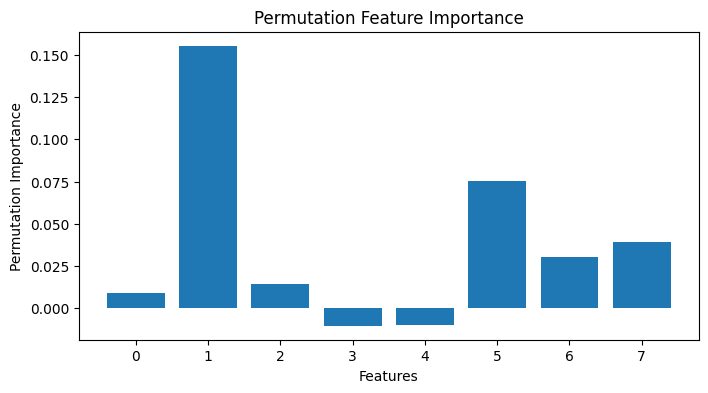

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Assuming you already have your DataFrame 'df' with the data loaded

# Separate features and target variable
X = df.drop("Class_variable", axis=1)
y = df["Class_variable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Perform Permutation Feature Importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

# Create DataFrame for Summary
feature_names = [f"Feature_{i+1}" for i in range(X.shape[1])]
df_results = pd.DataFrame({
    "Feature_name": feature_names,
    "Permutation_Importance": result.importances_mean})

df_results["Feature_Ranking"] = df_results["Permutation_Importance"].rank(ascending=False).astype(int)
df_results["Select_Feature"] = df_results["Feature_Ranking"] <= 4

# Display results
print(df_results)

# Plotting the feature importance
plt.figure(figsize=(8, 4))
plt.bar(range(len(result.importances_mean)), result.importances_mean)
plt.xlabel('Features')
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()
